In [5]:
from src. LogisticRegressionModel import LogisticRegressionModel
from src.SupervisedLearning.LogisticRegression.Optimizer import GradientDecent
from src.SupervisedLearning.LogisticRegression.utils import *

SyntaxError: invalid syntax (<ipython-input-5-dcb5cff35dd4>, line 1)

In [11]:
import src.SupervisedLearning.LogisticRegression

ModuleNotFoundError: No module named 'src'

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

In [158]:
iris = datasets.load_iris()

In [159]:
X = pd.DataFrame(iris.data[:100, :2])  # we only take the first two features.
Y = iris.target[:100:]

In [164]:
optim = GradientDecent(learning_rate =0.1, n_steps=1000, save_history=True)
optim.optimize(np.array([1,2]),X,Y)

array([ 2.91265093, -5.09698426])

In [165]:
logreg = LogisticRegressionModel(n_features =2, optimizer=optim)

In [166]:
logreg.fit(X,Y)

In [168]:
(logreg.predict(X) > 0.5) == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

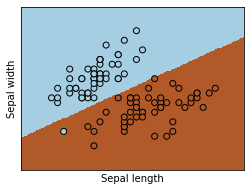

In [169]:
x_min, x_max = X.loc[:, 0].min() - .5, X.loc[:, 0].max() + .5
y_min, y_max = X.loc[:, 1].min() - .5, X.loc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])>0.5

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X.loc[:, 0], X.loc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
